In [1]:
import sys, os, glob, time
import matplotlib.pyplot as plt
import subprocess


In [2]:
params_bitmask_low_memo = [
    [3000, 2, 2000],
    [3000, 3, 2000],
    [3000, 4, 2000],
    [3000, 5, 2000],
    [3000, 6, 2000],
    [3000, 7, 2000],
    [3000, 8, 2000],
    [3000, 9, 2000],
    [3000, 10, 2000],
    [3000, 11, 2000],
    [3000, 12, 2000],
    [3000, 13, 2000],
    [3000, 14, 2000],
    [3000, 15, 2000],
    [3000, 16, 2000],
    [3000, 17, 2000],
    [3000, 18, 2000],
    [3000, 19, 2000],
    [3000, 20, 3000],
    [3000, 21, 3000],
    [3000, 22, 3000],
    [3000, 23, 3000],
    [3000, 24, 3000],
    [3000, 25, 3000],
    [3000, 26, 3000],
    [3000, 27, 4000],
]
params_bitmask = params_bitmask_low_memo + [
    [3000, 28, 4000],
    [3000, 29, 4000],
    [3000, 30, 4000],
] 


In [3]:
def generate_tests(params, test_name):
    os.system("g++ -std=c++20 -O2 gen.cpp -o gen")
    index = 0
    test_cases = []
    for param in params:
        tag = str(index)
        if(len(tag) == 1):
            tag = "0" + tag
        os.system(f"./gen {param[0]} {param[1]} {param[2]} > {test_name.format(tag)}")
        test_cases.append(test_name.format(tag))
        index += 1
    return test_cases

In [4]:
def run_solution_on_test(solution, test_case):
    f_in = open(test_case, "r")
    f_out = open("aux.out", "w")
    start_time = time.time()
    parse_command = subprocess.Popen(["./parse_input.py"], stdin = f_in, stdout = subprocess.PIPE)
    solution_command = subprocess.Popen([f"./obj/{solution}"], stdin = parse_command.stdout, stdout = f_out)
    parse_command.stdout.close()
    
    solution_command.communicate()
    end_time = time.time()
    execution_time = end_time - start_time
    
    pace2024verifier_command = subprocess.run(["pace2024verifier", test_case, "aux.out"], stdout = subprocess.PIPE)

    crossings = int(pace2024verifier_command.stdout.split()[-6])

    return execution_time, crossings


def benchmark(solutions, test_cases):
    execution_times = dict()
    crossings = dict()

    for solution in solutions:
        os.system(f"./compile {solution}")
        run_data = []
        for test in test_cases:
            run_data.append(run_solution_on_test(solution, test))
            print(f"{solution}: {test}")
        execution_times[solution] = [t for (t, x) in run_data]
        crossings[solution] = [x for (t, x) in run_data]
    
    return execution_times, crossings


In [5]:
def plot(info, fast_solution, slow_solution):
    colors = 'brg'
    markers = 'oxt'
    idx = 0
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    for (sol, times) in info.items():
        n_values = list(range(2, 2 + len(times)))
        ax1.plot(n_values, times, marker=markers[idx], linestyle='-', color=colors[idx], label=sol)
        idx += 1
    
    ax1.set_xlabel('n')
    ax1.set_ylabel('Execution Time (seconds)')
    ax1.set_title('Execution Time vs n')

    speedup = [info[slow_solution][i] / info[fast_solution][i] for i in range(len(n_values))]

    ax2.plot(n_values, speedup, marker='o', linestyle='-', color='b')
    ax2.set_xlabel('n')
    ax2.set_ylabel('Speedup')
    ax2.set_title('Speedup vs n')

    ax1.legend()
    plt.show()

In [6]:
test_cases = generate_tests(params_bitmask, "tests/bitmask_tests/{}_random_bitmask.gr")
data = benchmark(["opt_memo_parallel_bitmask_dp", "opt_memo_bitmask_dp"], test_cases)

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


opt_memo_parallel_bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
opt_memo_parallel_bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
opt_me

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


opt_memo_bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/14_random_bitmask.gr
opt_memo_bitmask_dp: tests/bitmask_tests/15_random_bitmask.gr
opt_memo

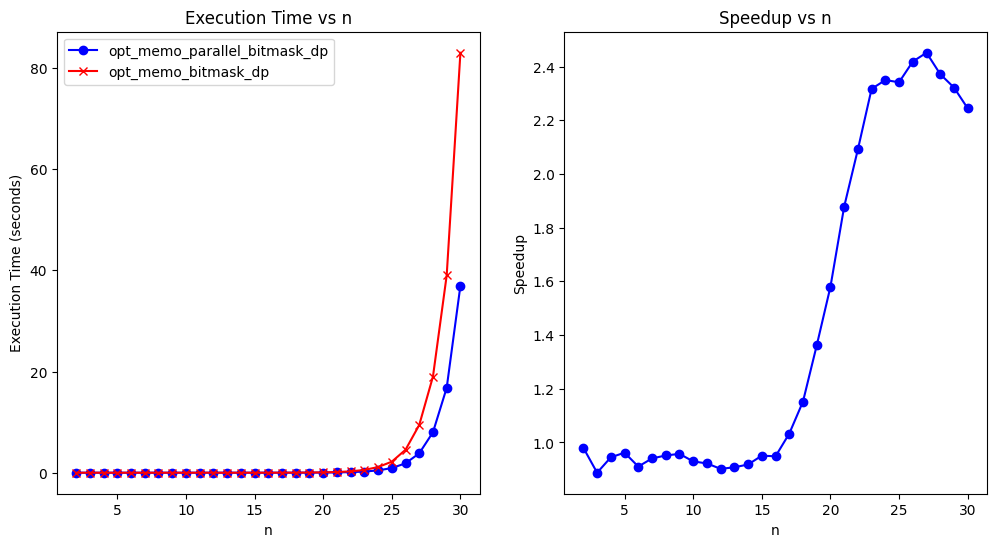

In [7]:
plot(data[0], "opt_memo_parallel_bitmask_dp", "opt_memo_bitmask_dp")

In [8]:
test_cases = generate_tests(params_bitmask_low_memo, "tests/bitmask_tests/{}_random_bitmask.gr")
data = benchmark(["parallel_bitmask_dp", "bitmask_dp"], test_cases)

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


parallel_bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/14_random_bitmask.gr
parallel_bitmask_dp: tests/bitmask_tests/15_random_bitmask.gr
parallel

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/14_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/15_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/16_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/17_random_bitmask.gr
bitmask_dp: tests/bitmask_tests/18_random_bitm

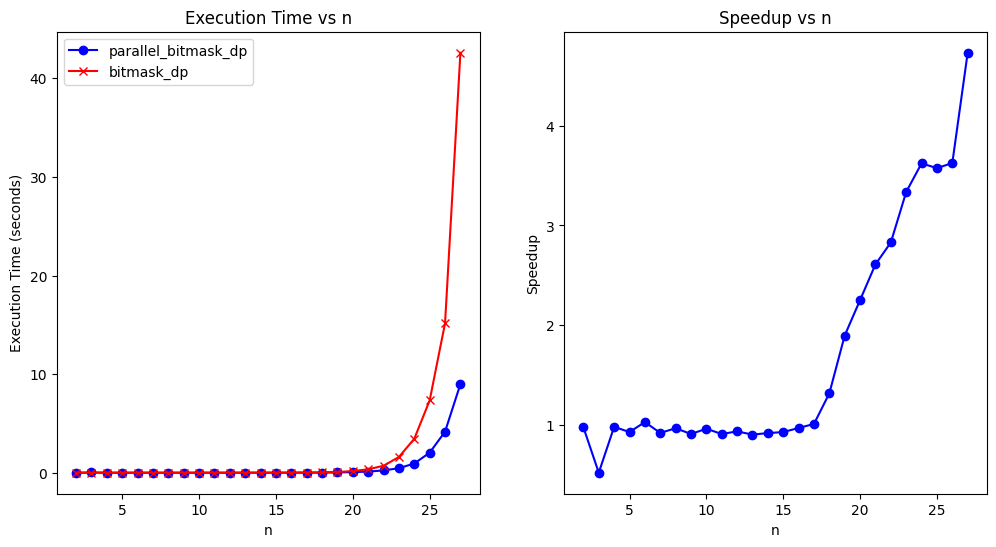

In [9]:
plot(data[0], "parallel_bitmask_dp", "bitmask_dp")

In [10]:
test_cases = generate_tests(params_bitmask, "tests/bitmask_tests/{}_random_bitmask.gr")
data = benchmark(["slow_parallel_bitmask_dp", "slow_bitmask_dp"], test_cases)

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


slow_parallel_bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
slow_parallel_bitmask_dp: tests/bitmask_tests/14_random_bitmas

cost_matrix.h:1:9: warning: #pragma once in main file
    1 | #pragma once
      |         ^~~~


slow_bitmask_dp: tests/bitmask_tests/00_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/01_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/02_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/03_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/04_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/05_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/06_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/07_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/08_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/09_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/10_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/11_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/12_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/13_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/14_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/15_random_bitmask.gr
slow_bitmask_dp: tests/bitmask_tests/16_random_bitmask.gr
slow_bitmask_d

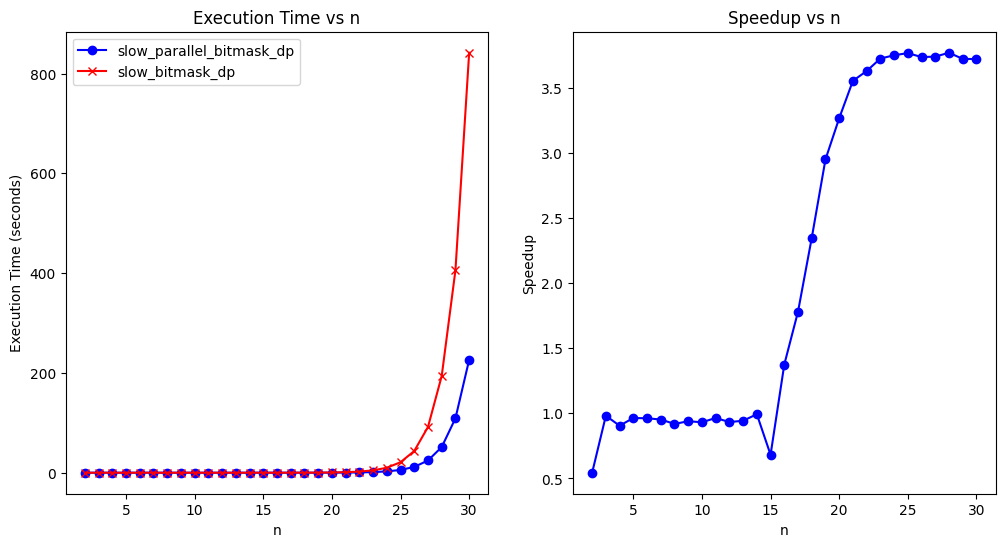

In [11]:
plot(data[0], "slow_parallel_bitmask_dp", "slow_bitmask_dp")